In [2]:
import sys
sys.path.append('c:\\Users\\rokas\\Documents\\Github\\BCI\\mi-bci\\code')
from helper_functions import setup_logger
from datasets import Lee2019
import numpy as np
import mne
import os
from autoreject import AutoReject
from pyprep.prep_pipeline import PrepPipeline
import matplotlib.pyplot as plt
from helper_functions import setup_logger
import shutil

def preprocess_raw(raw, event_id,tmin=None,tmax=None,
                   save = False, dataset_no = None, paradigm = None, 
                   subject = None, run = None):
    if save:
        root_path = os.path.join(os.getcwd(),'data','procesed',str(dataset_no), paradigm,str(subject),str(run))
        os.makedirs(root_path, exist_ok=True)

    #     event_id = {'left_hand': 1, 'right_hand': 2, 'passive_state': 3}
    if tmin and tmax == None:
        log.error("tmin and tmax were not defined")
    elif tmin == None:
        log.error("tmin was not defined")
    elif tmax == None:
        log.error("tmax was not defined")
        
    epochs_raw = mne.read_epochs(os.path.join(root_path, 's{:02}.{:02}_epochs_raw-epo.fif'.format(subject, run)), preload=True)

    epochs_raw_cleaned = mne.read_epochs(os.path.join(root_path, 's{:02}.{:02}_epochs_raw_cleaned-epo.fif'.format(subject, run)), preload=True)

    ar = AutoReject(n_jobs=-1)
    epochs_raw_autoreject = ar.fit_transform(epochs_raw)
    epochs_raw_cleaned_autoreject = ar.fit_transform(epochs_raw_cleaned)
    
    if save:
        epochs_raw_autoreject.save(os.path.join(root_path, 's{:02}.{:02}_epochs_raw_autoreject-epo.fif'.format(subject, run)), overwrite=True)
        log.info("s{:02}.{:02}_epochs_raw_autoreject-epo.fif SAVED".format(subject, run))

        epochs_raw_cleaned_autoreject.save(os.path.join(root_path, 's{:02}.{:02}_epochs_raw_cleaned_autoreject-epo.fif'.format(subject, run)), overwrite=True)
        log.info("s{:02}.{:02}_epochs_raw_cleaned_autoreject-epo.fif SAVED".format(subject, run))

       
    return [epochs_raw, epochs_raw_cleaned, epochs_raw_autoreject, epochs_raw_cleaned_autoreject, raw_cleaned, raw]



In [4]:
import sys
sys.path.append('c:\\Users\\rokas\\Documents\\Github\\BCI\\mi-bci\\code')
from helper_functions import setup_logger
from datasets import Lee2019

log = setup_logger("Lee_preprocess")

dataset = Lee2019()

paradigm = "MI"
tmin = -1.2
tmax = 5.2
event_id = dict(left_hand=2, right_hand=1)

for subject in [4,5]: #3.2 nėra
    for run in [1]: 
        try:
            log.info(f"\n ++++++++++Starting subject-{subject} , run-{run}+++++++++++++ \n")
            raw_loaded = dataset.load_one_raw_fif(subject=subject,run=run,paradigm = paradigm)
            log.info(f"\n +++++++++raw loaded (subject-{subject} , run-{run})+++++++++++++ \n")

            raw = raw_loaded.filter(l_freq=8, h_freq=30, method='iir', iir_params=dict(order=5, ftype='butter'))
            log.info(f"\n ++++++++++raw filtered (subject-{subject} , run-{run})++++++++++ \n")

            data = preprocess_raw(raw, event_id = event_id, tmin=tmin, tmax=tmax, dataset_no=20,
                                subject=subject, run=run,paradigm=paradigm, save=True)
            log.info(f"\n ++++++++++Successfully executed preprocessing for subject-{subject} , run-{run} +++++++++++ \n")

        except Exception as e:
            log.error(f"Error with subject-{subject}, run-{run}: {e}")

2025-03-30 14:40:31,891 - Lee_preprocess - INFO - 
 ++++++++++Starting subject-4 , run-1+++++++++++++ 



Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s04.01_raw.fif...
    Range : 0 ... 1384719 =      0.000 ...  1384.719 secs
Ready.
Reading 0 ... 1384719  =      0.000 ...  1384.719 secs...


2025-03-30 14:40:33,024 - Lee_preprocess - INFO - 
 +++++++++raw loaded (subject-4 , run-1)+++++++++++++ 



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB



2025-03-30 14:40:36,270 - Lee_preprocess - INFO - 
 ++++++++++raw filtered (subject-4 , run-1)++++++++++ 



Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\procesed\20\MI\4\1\s04.01_epochs_raw-epo.fif ...
    Found the data of interest:
        t =   -1200.00 ...    5200.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\procesed\20\MI\4\1\s04.01_epochs_raw_cleaned-epo.fif ...
    Found the data of interest:
        t =   -1200.00 ...    5200.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/62 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/62 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=4


  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

Dropped 1 epoch: 92
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/62 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/62 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

Dropped 3 epochs: 91, 92, 99


2025-03-30 14:58:53,911 - Lee_preprocess - INFO - s04.01_epochs_raw_autoreject-epo.fif SAVED
2025-03-30 14:58:54,646 - Lee_preprocess - INFO - s04.01_epochs_raw_cleaned_autoreject-epo.fif SAVED
2025-03-30 14:58:54,646 - Lee_preprocess - ERROR - Error with subject-4, run-1: name 'raw_cleaned' is not defined
2025-03-30 14:58:54,765 - Lee_preprocess - INFO - 
 ++++++++++Starting subject-5 , run-1+++++++++++++ 



Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s05.01_raw.fif...
    Range : 0 ... 1424679 =      0.000 ...  1424.679 secs
Ready.
Reading 0 ... 1424679  =      0.000 ...  1424.679 secs...


2025-03-30 14:58:56,182 - Lee_preprocess - INFO - 
 +++++++++raw loaded (subject-5 , run-1)+++++++++++++ 



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB



2025-03-30 14:58:59,796 - Lee_preprocess - INFO - 
 ++++++++++raw filtered (subject-5 , run-1)++++++++++ 



Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\procesed\20\MI\5\1\s05.01_epochs_raw-epo.fif ...
    Found the data of interest:
        t =   -1200.00 ...    5200.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\procesed\20\MI\5\1\s05.01_epochs_raw_cleaned-epo.fif ...
    Found the data of interest:
        t =   -1200.00 ...    5200.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/62 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/62 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=32


  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/62 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/62 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


2025-03-30 15:13:22,477 - Lee_preprocess - INFO - s05.01_epochs_raw_autoreject-epo.fif SAVED
2025-03-30 15:13:23,117 - Lee_preprocess - INFO - s05.01_epochs_raw_cleaned_autoreject-epo.fif SAVED
2025-03-30 15:13:23,118 - Lee_preprocess - ERROR - Error with subject-5, run-1: name 'raw_cleaned' is not defined


In [5]:
import sys
sys.path.append('c:\\Users\\rokas\\Documents\\GitHub\\BCI\\mi-bci\\code')
from pipelines.ml_pipelines_ba import features, classifiers
from sklearn.pipeline import Pipeline
pipeline = {}
pipeline['TDF_LDA'] = Pipeline([
    ('tdf', features['TDF']),
    ('lda', classifiers['LDA'])
])
pipeline['TDF_SVM'] = Pipeline([
    ('tdf', features['TDF']),
    ('svm', classifiers['SVM'])
])
pipeline['TDF_LR'] = Pipeline([
    ('tdf', features['TDF']),
    ('lr', classifiers['LR'])
])
pipeline['TDF_RF'] = Pipeline([
    ('tdf', features['TDF']),
    ('rf', classifiers['RF'])
])

In [ ]:
log = setup_logger("Lee_preprocess")

dataset = Lee2019()

paradigm = "MI"
tmin = -1.2
tmax = 5.2
event_id = dict(left_hand=2, right_hand=1)

subject = 4
run = 2  

log.info(f"\n ++++++++++Starting subject-{subject} , run-{run}+++++++++++++ \n")
raw_loaded = dataset.load_one_raw_fif(subject=subject,run=run,paradigm = paradigm)
log.info(f"\n +++++++++raw loaded (subject-{subject} , run-{run})+++++++++++++ \n")

raw = raw_loaded.filter(l_freq=8, h_freq=30, method='iir', iir_params=dict(order=5, ftype='butter'))
log.info(f"\n ++++++++++raw filtered (subject-{subject} , run-{run})++++++++++ \n")

data = preprocess_raw(raw, event_id = event_id, tmin=tmin, tmax=tmax, dataset_no=20,
                    subject=subject, run=run,paradigm=paradigm, save=True)
log.info(f"\n ++++++++++Successfully executed preprocessing for subject-{subject} , run-{run} +++++++++++ \n")

In [ ]:
import sys
sys.path.append('c:\\Users\\rokas\\Documents\\Github\\BCI\\mi-bci\\code')
from helper_functions import save_epochs

from helper_functions import preprocess_raw
from autoreject import AutoReject
from datasets import Lee2019
import mne
import os
import shutil

dataset = Lee2019()
paradigm = "MI"
dataset_no=20
tmin = -1.2
tmax = 5.2


for subject in [2,3]:
    for run in [1,2]:
        try:
            event_id = dict(left_hand=2, right_hand=1)

            root_path = os.path.join(os.getcwd(),'data','procesed',str(dataset_no), paradigm,str(subject),str(run))

            epochs_raw = mne.read_epochs(os.path.join(root_path, 's{:02}.{:02}_epochs_raw-epo.fif'.format(subject, run)), preload=True)
            epochs_raw_cleaned = mne.read_epochs(os.path.join(root_path, 's{:02}.{:02}_epochs_raw_cleaned-epo.fif'.format(subject, run)), preload=True)

            ar = AutoReject(n_jobs=-1)
            epochs_raw_autoreject = ar.fit_transform(epochs_raw.copy())
            epochs_raw_cleaned_autoreject = ar.fit_transform(epochs_raw_cleaned.copy())


            epochs_raw_autoreject.save(os.path.join(root_path, 's{:02}.{:02}_epochs_raw_autoreject-epo.fif'.format(subject, run)), overwrite=True)

            epochs_raw_cleaned_autoreject.save(os.path.join(root_path, 's{:02}.{:02}_epochs_raw_cleaned_autoreject-epo.fif'.format(subject, run)), overwrite=True)
        except Exception as e:
            print(f"Error with subject-{subject}, run-{run}: {e}")

In [2]:
import sys
sys.path.append('c:\\Users\\rokas\\Documents\\Github\\BCI\\mi-bci\\code')
from helper_functions import save_epochs

from helper_functions import preprocess_raw
from autoreject import AutoReject
from datasets import Lee2019
import mne
import os
import shutil

dataset = Lee2019()

subject = 1
run = 1
paradigm = "MI"
tmin = -1.2
tmax = 5.2
event_id = dict(left_hand=2, right_hand=1)

raw_loaded = dataset.load_one_raw_fif(subject=subject,run=run,paradigm = paradigm)

raw = raw_loaded.filter(l_freq=8, h_freq=30, method='iir', iir_params=dict(order=5, ftype='butter'))

events_raw = mne.find_events(raw) # Find events (triggers) in the data

epochs_raw = mne.Epochs(raw, events_raw, event_id=event_id, tmin=tmin, tmax=tmax)

temp_dir = os.path.join(os.getcwd(), 'data' ,'temp')
os.makedirs(temp_dir, exist_ok=True)
epochs_raw.save(os.path.join(temp_dir, 'epochs_raw-epo.fif'), overwrite=True)

epochs_raw = mne.read_epochs(os.path.join(temp_dir, 'epochs_raw-epo.fif'), preload=True)

#  Delete Temporary Directory
shutil.rmtree(temp_dir)  


ar = AutoReject(n_jobs=-1)
epochs_raw_autoreject = ar.fit_transform(epochs_raw.copy())


Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s01.01_raw.fif...
    Range : 0 ... 1418039 =      0.000 ...  1418.039 secs
Ready.
Reading 0 ... 1418039  =      0.000 ...  1418.039 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB

100 events found on stim channel STI 014
Event IDs: [1 2]
Not setting metadata
100 matching events found
Setting baseline interval to [-1.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 6401 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 6401 original time points ...
Using data from preloaded Raw for 100 events and 6401 original tim

  0%|          | Creating augmented epochs : 0/62 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/62 [00:00<?,       ?it/s]

KeyboardInterrupt: 

In [5]:
event_id = dict(left_hand=2, right_hand=1)

data = preprocess_raw(raw, event_id = event_id, tmin=tmin, tmax=tmax) #event_id reik dadet


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


KeyboardInterrupt: 

In [4]:
raw_loaded.periodogram()

AttributeError: 'Raw' object has no attribute 'periodogram'

Using matplotlib as 2D backend.


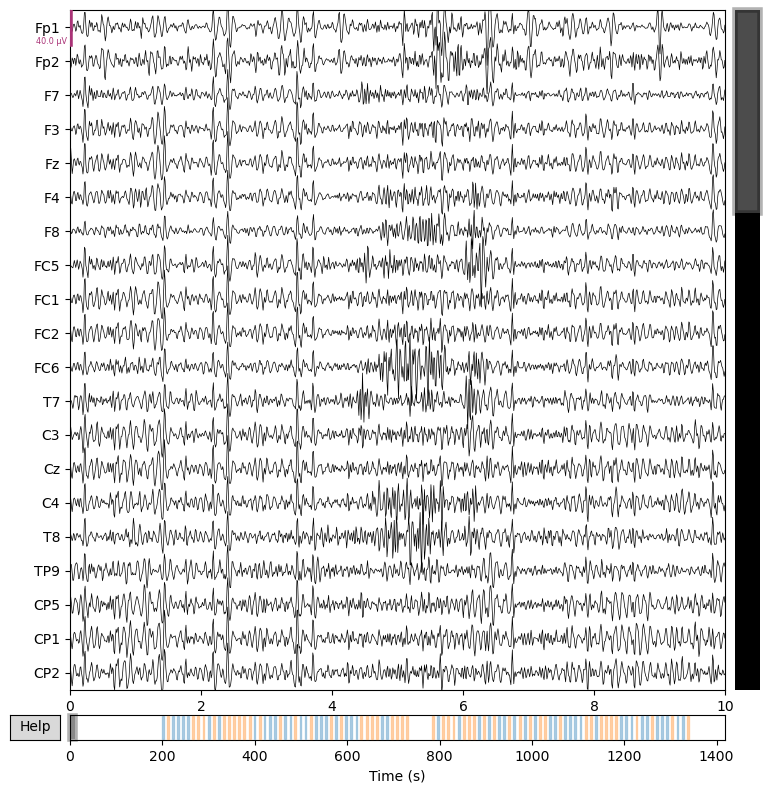

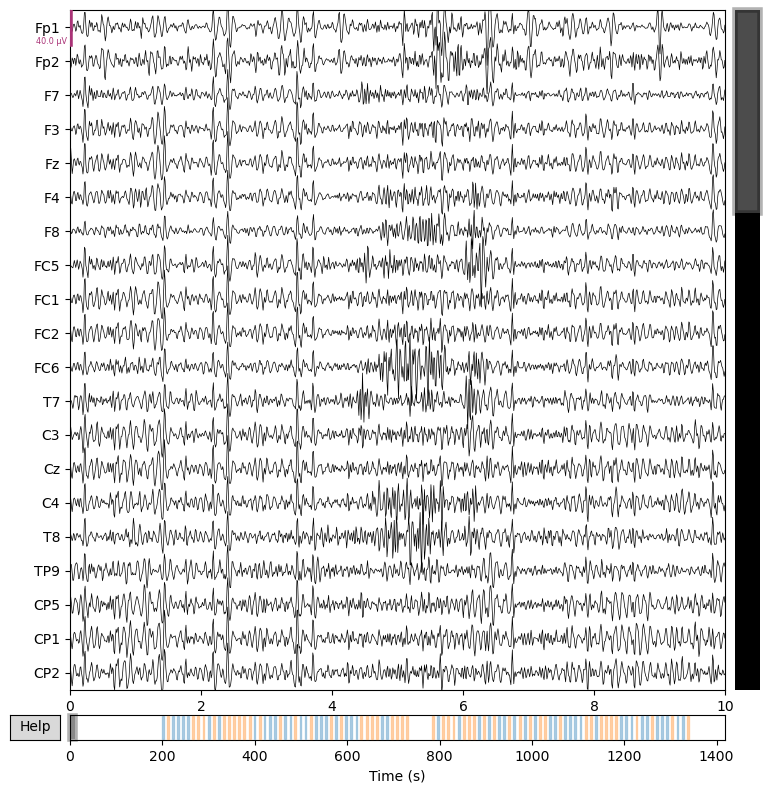

In [2]:
raw.plot()

 # Dataset links

1. http://gigadb.org/dataset/100295
2. https://www.physionet.org/content/eegmmidb/1.0.0/
3. https://figshare.com/collections/A_large_electroencephalographic_motor_imagery_dataset_for_electroencephalographic_brain_computer_interfaces/3917698
4. https://www.bbci.de/competition/iv/#dataset1
5. https://www.bbci.de/competition/iv/#dataset2a
6. https://www.bbci.de/competition/iv/#dataset2b
7. https://doi.org/10.7910/DVN/RBN3XG
8. https://bbci.de/competition/iii/#data_set_iiia
9. https://bbci.de/competition/iii/#data_set_iiib
10. https://bbci.de/competition/iii/#data_set_iva
11. https://bbci.de/competition/iii/#data_set_ivb
12. https://bbci.de/competition/iii/#data_set_ivc
13. https://www.bbci.de/competition/ii/
14. https://openvibe.inria.fr/datasets-downloads/
15. https://bnci-horizon-2020.eu/database/data-sets
16. https://lampx.tugraz.at/~bci/database/004-2015/description.pdf
17. https://lampx.tugraz.at/~bci/database/001-2017/dataset_description.pdf
18. https://lampx.tugraz.at/~bci/database/002-2014/description.pdf

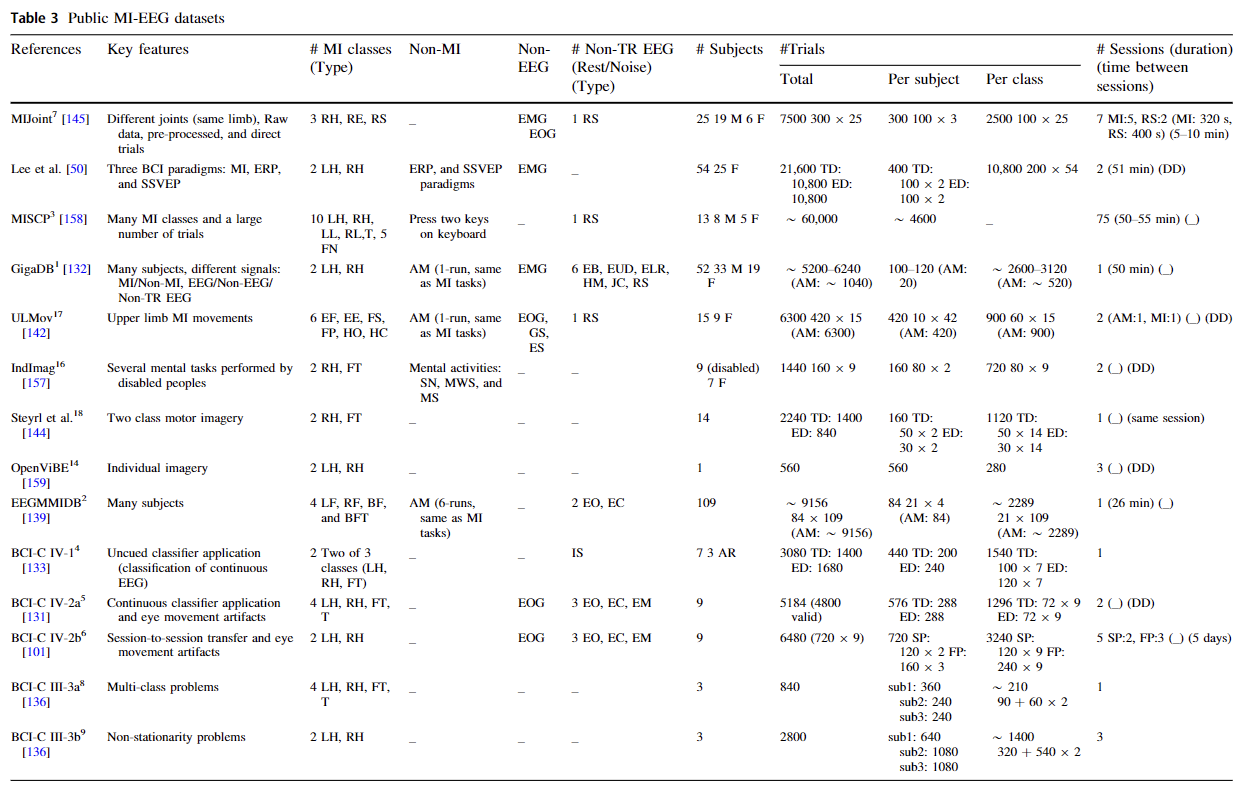
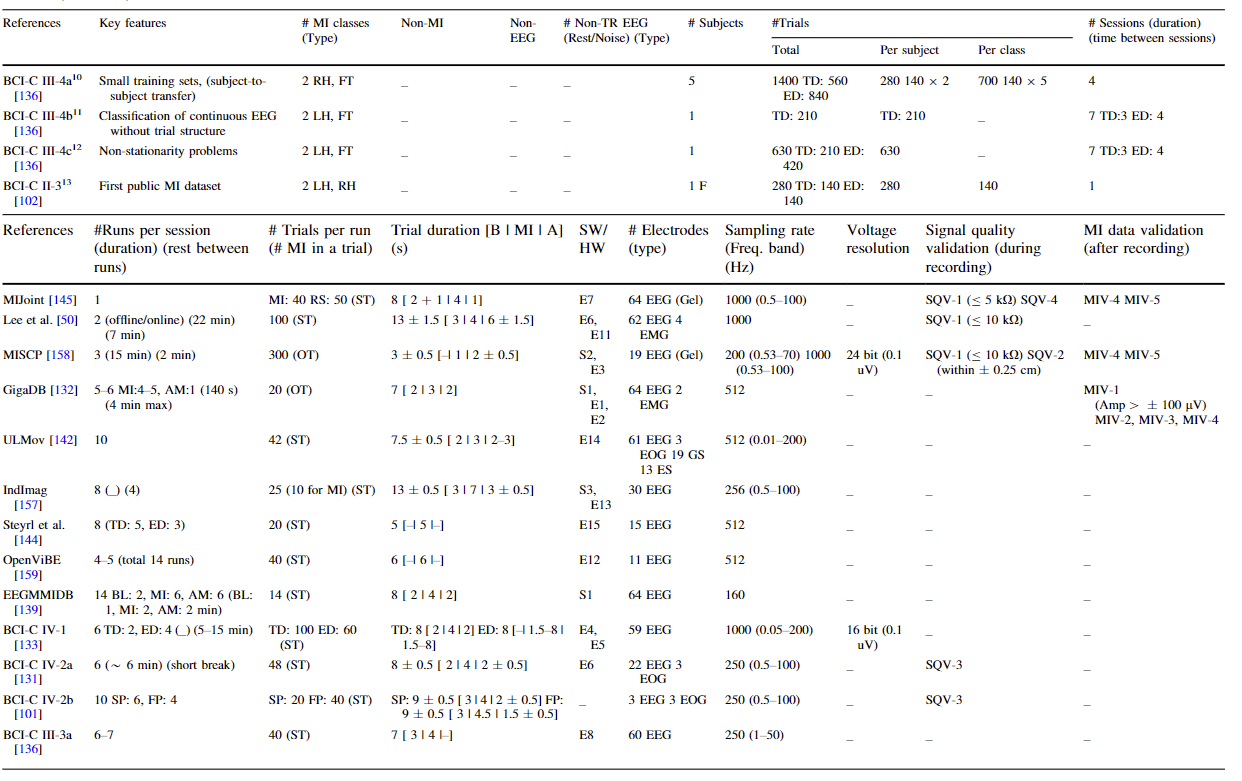
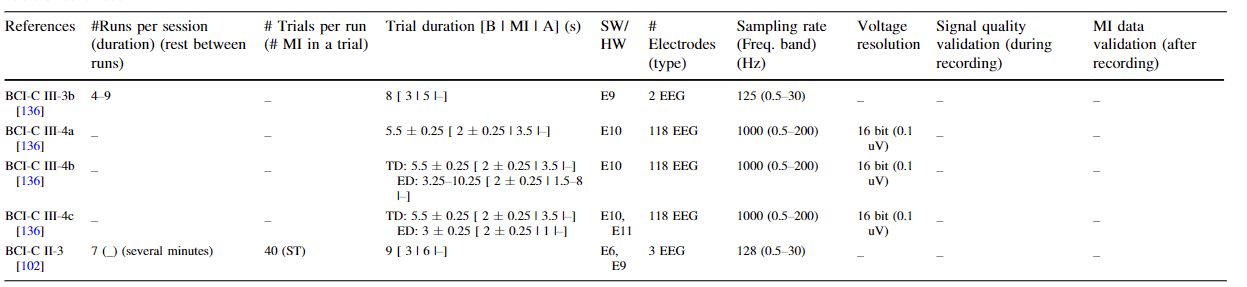

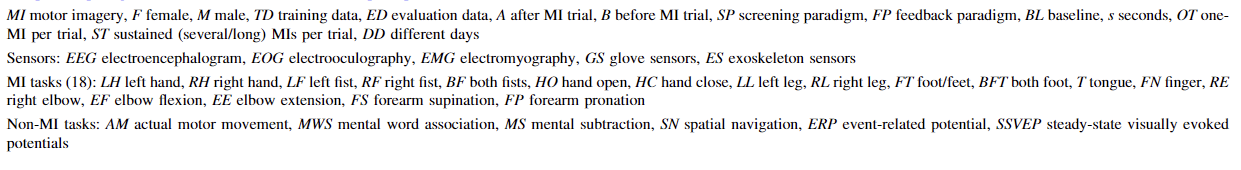
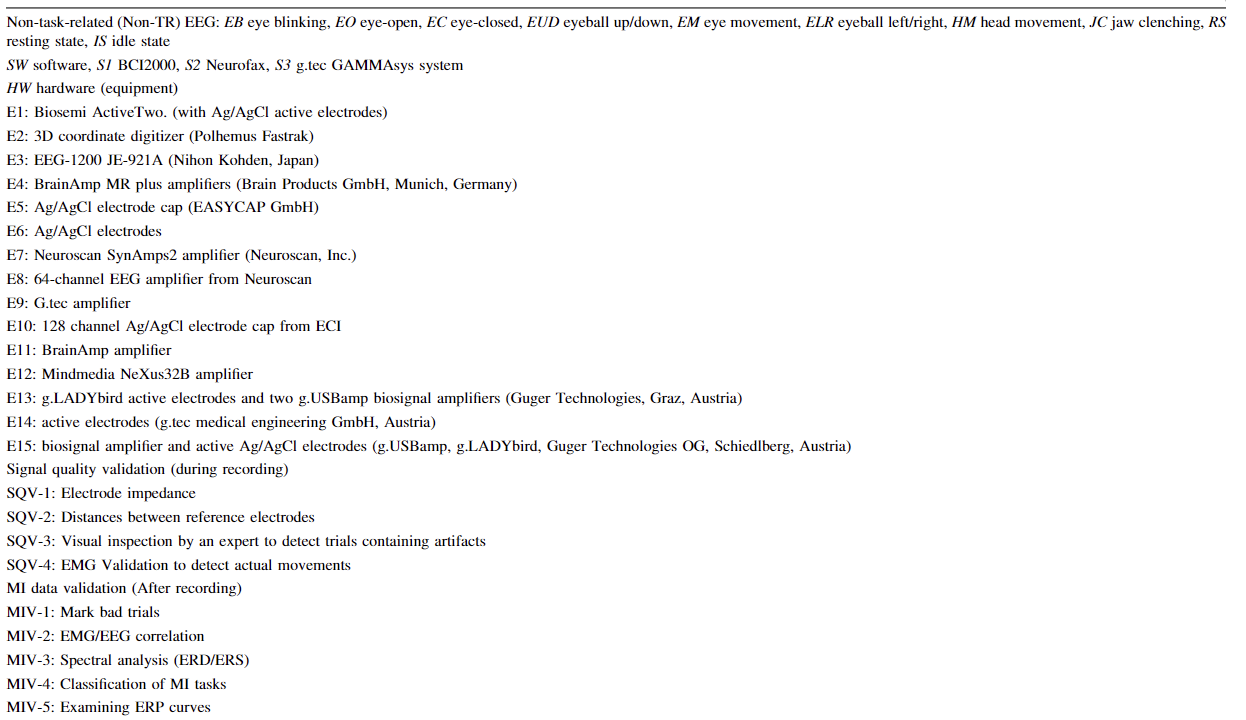